In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from twitter_sentiment import *#SentimentPredictor, TOKENIZER
def setup_plots(version,path,df):
    fig, axs = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
    print(f'version: {version}\n')
    print(df.tail(5)[['step','train_acc', 'train_f1', 'train_loss']])
    # Train Acc
    axs[0].plot(df['step'], df['train_acc'], label='Train Acc', color='blue')
    axs[0].set_ylabel('Train Acc')
    axs[0].set_title('Train Acc vs Step')
    axs[0].legend()
    axs[0].grid(True)

    # Train F1
    axs[1].plot(df['step'], df['train_f1'], label='Train F1', color='green')
    axs[1].set_ylabel('Train F1')
    axs[1].set_title('Train F1 vs Step')
    axs[1].legend()
    axs[1].grid(True)

    # Train Loss
    axs[2].plot(df['step'], df['train_loss'], label='Train Loss', color='red')
    axs[2].set_xlabel('Step')
    axs[2].set_ylabel('Train Loss')
    axs[2].set_title('Train Loss vs Step')
    axs[2].legend()
    axs[2].grid(True)
    for ax in axs:
        ax.set_ylim(0.0, 1.0)
        for ax in axs:
            ax.set_facecolor('black')
            ax.tick_params(colors='white')
            ax.yaxis.label.set_color('white')
            ax.xaxis.label.set_color('white')
            ax.title.set_color('white')
            ax.grid(color='white')
            # Set legend text color to white
            legend = ax.get_legend()
            if legend:
                for text in legend.get_texts():
                    text.set_color('white')
    fig.patch.set_facecolor('black')
    plt.tight_layout()
    plt.show()
    return fig, axs



version: 250

     step  train_acc  train_f1  train_loss
129  6499   0.508681  0.680710    0.630213
130  6549   0.534722  0.726755    0.520486
131  6599   0.493056  0.749565    0.488121
132  6649   0.539062  0.726755    0.540983
133  6699   0.503472  0.706294    0.552798


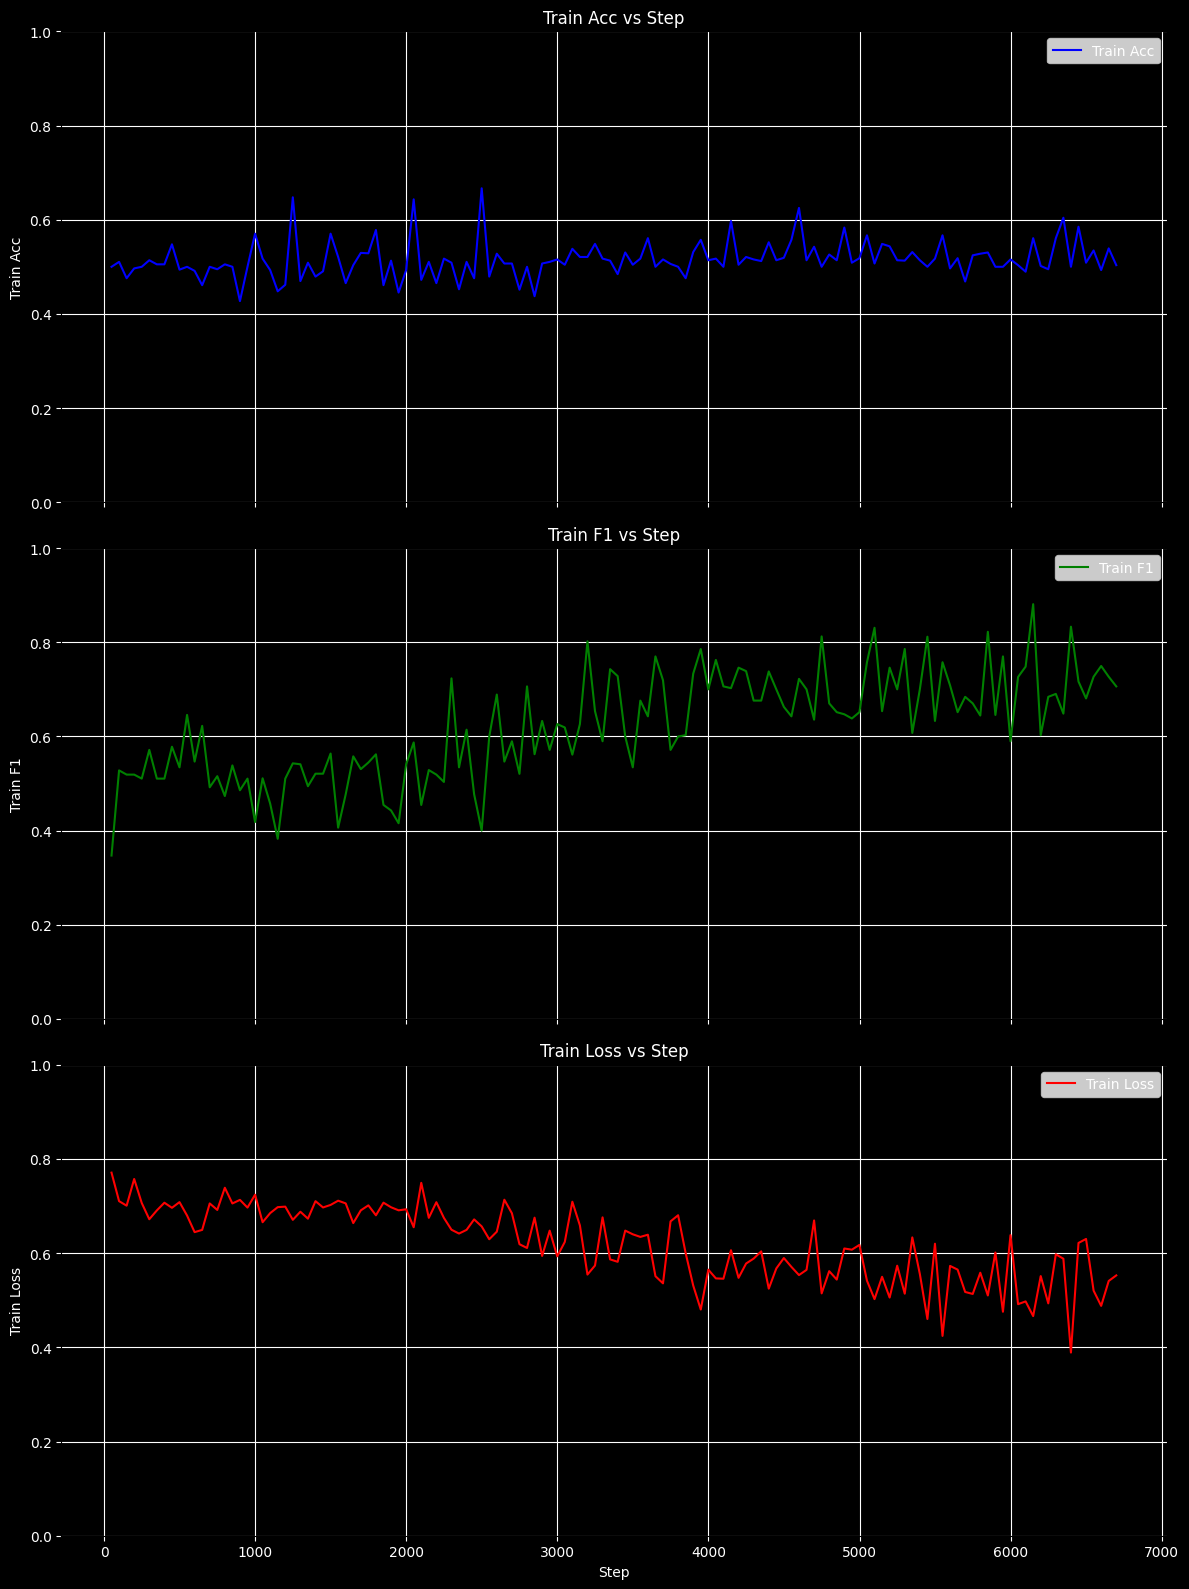

In [145]:
# 172,244 is one of the best in terms of consistently high accuracy
version = int(re.findall(r'version_(\d+)', str(get_latest_version()).split('\\')[-1])[0]); path = f'C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/checkpoints/twitter_sentiment/lightning_logs/version_{version}/metrics.csv'
df = pd.read_csv(path); fig, axs = setup_plots(version=version, path=path, df=df)

In [146]:
acc_avg = df['train_acc'].mean()
f1_avg = df['train_f1'].mean()
loss_avg = df['train_loss'].mean()

print(f'Training Accuracy Average: {acc_avg}')
print(f'Training F1 Average      : {f1_avg}')
print(f'Training Loss Average    : {loss_avg}')

Training Accuracy Average: 0.5154630532905237
Training F1 Average      : 0.6206659140871532
Training Loss Average    : 0.6191401474956256


In [147]:
val_acc_avg = df['val_acc'].mean()
val_f1_avg = df['val_f1'].mean()
val_loss_avg = df['val_loss'].mean()

print(f'Validation Accuracy Average: {val_acc_avg}')
print(f'Validation F1 Average      : {val_f1_avg}')
print(f'Validation Loss Average    : {val_loss_avg}')
df[~pd.isna(df['val_acc'])][['val_acc','val_f1','val_loss']]

KeyError: 'val_acc'

In [ ]:
test_acc_avg = df['test_acc'].mean()
test_f1_avg = df['test_f1'].mean()
test_loss_avg = df['test_loss'].mean()

print(f'Test Accuracy Average: {test_acc_avg}')
print(f'Test F1 Average      : {test_f1_avg}')
print(f'Test Loss Average    : {test_loss_avg}')
df[~pd.isna(df['test_acc'])][['test_acc','test_f1','test_loss']]

Test Accuracy Average: 0.7817420661449432
Test F1 Average      : 0.44017721712589264
Test Loss Average    : 0.4658437073230743


,test_acc,test_f1,test_loss
318,0.770864,0.438781,0.468395
319,0.792620,0.441574,0.463293


In [ ]:
raise Exception()

In [ ]:
import torch, json, re
p = 'C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/checkpoints/twitter_sentiment/lightning_logs/version_'#{version}/metrics.csv'
df_test_combined = pd.DataFrame()
scan_mode = 'val'
select_cols = ['version', 'epoch', f'{scan_mode}_acc', f'{scan_mode}_loss', f'{scan_mode}_f1', 'input_dim', 'model_dim', 'num_heads', 'num_layers', 'lr', 'dropout', 'warmup', 'num_classes','max_seq_len','max_iters']
latest_version = int(re.findall(r'version_(\d+)', str(get_latest_version()).split('\\')[-1])[0])
for v in list(range(211,latest_version+1)):
    p_ = f'{p}{v}'
    try:
        with open(f'{p_}/hparams.yaml', 'r') as f:
            content = f.read()
            match = re.findall(r'([a-zA-Z0-9_]+):\s*(\S+)', content)

        df_test = pd.read_csv(f'{p_}/metrics.csv')
        df_test = df_test[df_test.apply(lambda x: pd.notna(x[f'{scan_mode}_acc']) and pd.notna(x[f'{scan_mode}_loss']) and str(x[f'{scan_mode}_acc']).strip() not in ['nan', 'None', ''], axis=1)][['epoch',f'{scan_mode}_acc', f'{scan_mode}_loss', f'{scan_mode}_f1']]
        df_test['version'] = [v] * len(df_test)
        df_test['avg_acc'] = [df_test[f'{scan_mode}_acc'].mean()] * len(df_test)
        df_test['avg_loss'] = [df_test[f'{scan_mode}_loss'].mean()] * len(df_test)
        df_test['avg_f1'] = [df_test[f'{scan_mode}_f1'].mean()] * len(df_test)
        # print(match)
        version_dict = {str(hparam_name): [str(value)]*len(df_test) for hparam_name, value in match}
        version_dict['version'] = [v] * len(df_test)
        df_hparams = pd.DataFrame(version_dict)
    except:
        continue
    df_merged = pd.merge(df_test, df_hparams, on='version')
    df_test_combined = pd.concat([df_test_combined, df_merged], ignore_index=True)[select_cols+['avg_acc','avg_loss','avg_f1']]
df_test_combined = df_test_combined.sort_values(by=['version', 'epoch', f'{scan_mode}_acc', 'model_dim', 'num_heads', 'num_layers', 'lr', 'dropout', 'warmup'])
df_test_combined = df_test_combined.reset_index(drop=True)
def get_best_acc(df, filter_=f'{scan_mode}_acc'):
    return df[df[filter_] >= df[filter_].max()-0.02]
df_best = get_best_acc(df_test_combined, f'val_acc')#df_test_combined[df_test_combined["test_acc"] == df_test_combined["test_acc"].max()]
df_test_combined[df_test_combined['version'].isin(df_best['version'])][select_cols+['avg_acc','avg_loss','avg_f1']]

,version,epoch,val_acc,val_loss,val_f1,input_dim,model_dim,num_heads,num_layers,lr,dropout,warmup,num_classes,max_seq_len,max_iters,avg_acc,avg_loss,avg_f1
0,211,0,0.825199,0.380084,0.456722,768,768,6,6,5.0e-05,0.4,100,2,282,15870,0.825199,0.380084,0.456722
1,212,0,0.823410,0.378301,0.457327,768,768,6,6,5.0e-05,0.4,1000,2,282,15870,0.823410,0.378301,0.457327
4,215,0,0.817553,0.377718,0.455597,768,768,6,6,5.0e-05,0.2,100,2,282,15870,0.817553,0.377718,0.455597
5,216,0,0.819424,0.379431,0.456533,768,768,6,6,5.0e-05,0.2,1000,2,282,15870,0.819424,0.379431,0.456533
8,219,0,0.825769,0.379680,0.458379,768,768,6,8,5.0e-05,0.4,100,2,282,15870,0.825769,0.379680,0.458379
9,220,0,0.824711,0.378258,0.456734,768,768,6,8,5.0e-05,0.4,1000,2,282,15870,0.824711,0.378258,0.456734
12,223,0,0.820888,0.378192,0.456910,768,768,6,8,5.0e-05,0.2,100,2,282,15870,0.820888,0.378192,0.456910
13,224,0,0.822922,0.378149,0.457284,768,768,6,8,5.0e-05,0.2,1000,2,282,15870,0.822922,0.378149,0.457284
16,227,0,0.824467,0.377350,0.457326,768,768,8,6,5.0e-05,0.4,100,2,282,15870,0.824467,0.377350,0.457326
17,228,0,0.818611,0.378725,0.455489,768,768,8,6,5.0e-05,0.4,1000,2,282,15870,0.818611,0.378725,0.455489


In [ ]:
# df_test_combined[df_test_combined['val_acc'] == df_test_combined['val_acc'].max()]


In [ ]:
best_acc_versions = [int(i) for i in df_best['version'].unique().tolist()]
best_model = best_acc_versions[-1]
print(f'Best Model Version: {best_model}\n')
p = f'C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/checkpoints/twitter_sentiment/lightning_logs/version_{version}/checkpoints/best_acc.ckpt'
predictor = SentimentPredictor.load_from_checkpoint(p)
predictor.eval()
def best_model_predict(text):
    tokenized = TOKENIZER.encode(text, add_special_tokens=True, truncation=True, padding='max_length', max_length=MAX_SEQ_LEN, return_tensors="pt").squeeze(0).to('cuda:0')
    predictions = predictor(tokenized).argmax(dim=-1)
    
    if predictions.item() == 1:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'
msg = input("Message: ")
print(f'Message: {msg}\n{best_model_predict(msg)}')

Best Model Version: 210

Message: that sucks
NEGATIVE


In [ ]:
# df_train,df_val,df_test = get_datasets(dataset_distributions,redistribute_allocs)
# df = pd.concat([df_train, df_val, df_test], ignore_index=True).sample(n=sample_num, random_state=42).reset_index(drop=True)
sample_num = 20

# Evenly balance the classes in the test dataset
df = combine_sentiment_datasets(target_classes=[0,1], supplement_minority_classes={1:1})
min_category = df['sentiment'].value_counts().min()
max_category = df['sentiment'].value_counts().max()
df_redistribute = pd.DataFrame({'message': [], 'sentiment': []})
for i in list(set(df['sentiment'])):
    cur_category = len(df[df['sentiment'] == i])
    if cur_category == min_category:
        continue
    df_redistribute = pd.concat([df_redistribute, df[df['sentiment']==i].sample(n=cur_category-min_category,random_state=42)])
redistribute_index = list(df_redistribute.index)
df = df[~df.index.isin(redistribute_index)]
texts = df['message'].tolist()
inputs = [TOKENIZER.encode(text, add_special_tokens=True, truncation=True, padding='max_length', max_length=MAX_SEQ_LEN, return_tensors="pt").squeeze(0).to('cuda:0') for text in texts]
labels = df['sentiment'].tolist()

total_predictions = []
map_predictions = {'correct_positive': 0, 'correct_negative': 0, 'incorrect_positive': 0, 'incorrect_negative': 0}
total_correct = 0
total_samples = len(labels)
predicted_labels = {0: 0, 1: 0}
for version in best_acc_versions:
    p_ = f'{p}{version}/checkpoints/best_acc.ckpt'
    model = SentimentPredictor.load_from_checkpoint(p_)
    model.eval()
    # Example usage: predict sentiment for a list of texts
    with torch.no_grad():
        for tokenized_input, label in zip(inputs, labels):
            outputs = model(**{'x': tokenized_input.to('cuda:0')})#, 'labels': torch.tensor(labels)})
            logits = outputs.logits if hasattr(outputs, "logits") else outputs[0]
            predictions = torch.argmax(logits, dim=-1)
            prediction = predictions.item()
            predicted_labels[prediction] += 1
            if prediction == label:
                if label == 0:
                    map_predictions['correct_positive'] += 1
                else:
                    map_predictions['correct_negative'] += 1
                total_correct += 1
            else:
                if label == 0:
                    map_predictions['incorrect_positive'] += 1
                else:
                    map_predictions['incorrect_negative'] += 1
    avg_accuracy = (predictions == torch.tensor(labels).to('cuda:0')).float().mean().item()
avg_accuracy = total_correct / total_samples
print(f"Average accuracy for version {version}: {avg_accuracy:.4f}")
# print("Predictions:", predictions.tolist())
print(json.dumps(map_predictions, indent=4))


TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [ ]:
from transformers import pipeline, AutoModel
sent_pipeline = pipeline("sentiment-analysis")
tokenizer = 
embedding_layer = AutoModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
sent_pipeline("Fuck")

[{'label': 'NEGATIVE', 'score': 0.9979010820388794}]

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")

# print("Path to dataset files:", path)

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mgmitesh/sentiment-analysis-dataset")

# print("Path to dataset files:", path)

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

# print("Path to dataset files:", path)

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("durgeshrao9993/twitter-analysis-dataset-2022")

# print("Path to dataset files:", path)